<a href="https://colab.research.google.com/github/perpendicooler/SMV/blob/main/SMV_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor




In [ ]:
# 1. Data Loading
data = pd.read_excel('/content/SMV.xlsx')  # Load dataset
print("First few rows of the dataset:")
print(data.head())  # Display the first few rows

First few rows of the dataset:
    GG                   Operation Operation Position Operation Description  \
0  7GG  Interlock (Point To Point)         Front Part              Shoulder   
1  7GG  Interlock (Point To Point)             Sleeve                Sleeve   
2  7GG  Interlock (Point To Point)  Front & Back Part              Shoulder   
3  7GG  Interlock (Point To Point)             Sleeve                Sleeve   
4  7GG  Interlock (Point To Point)         Front Part              Shoulder   

   Percentage 1  Fiber 1 Count 1  Ply 1  Percentage 2   Fiber 2 Count 2  \
0            73  Acrylic       0      0            24     Nylon       0   
1            73  Acrylic       0      0            24     Nylon       0   
2            60   Cotton       0      0            40  Acrylic     2/16   
3            60   Cotton       0      0            40   Acrylic    2/16   
4           100   Cotton    2/20      3             0         0       0   

   Ply 2  Percentage 3  Fiber 3 Count 3  Pl

In [ ]:
# 2. Data Cleaning
data.replace('-', pd.NA, inplace=True)  # Replace '-' with NaN
data.fillna(0, inplace=True)  # Fill NaN values with 0
print("\nDataset after cleaning:")
print(data.info())  # Check the dataset after cleaning



Dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265 entries, 0 to 1264
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GG                     1265 non-null   object 
 1   Operation              1265 non-null   object 
 2   Operation Position     1265 non-null   object 
 3   Operation Description  1265 non-null   object 
 4   Percentage 1           1265 non-null   int64  
 5   Fiber 1                1265 non-null   object 
 6   Count 1                1265 non-null   object 
 7   Ply 1                  1265 non-null   int64  
 8   Percentage 2           1265 non-null   int64  
 9   Fiber 2                1265 non-null   object 
 10  Count 2                1265 non-null   object 
 11  Ply 2                  1265 non-null   int64  
 12  Percentage 3           1265 non-null   int64  
 13  Fiber 3                1265 non-null   object 
 14  Count 3                1265 non

In [ ]:
# 3. Feature Selection
categorical_features = ['GG', 'Operation', 'Operation Position', 'Operation Description',
                        'Fiber 1', 'Fiber 2', 'Fiber 3', 'Knit Construction',
                        'Count 1', 'Count 2', 'Count 3']

numerical_features = ['Percentage 1', 'Percentage 2', 'Percentage 3',
                      'Ply 1', 'Ply 2', 'Ply 3', 'MC Speed', 'Length (cm)']

In [ ]:
# 4. Encoding Categorical Variables
data_encoded = pd.get_dummies(data, columns=categorical_features)
print("\nFirst few rows after encoding categorical variables:")
print(data_encoded.head())  # Display first few rows of the encoded data


First few rows after encoding categorical variables:
   Percentage 1  Ply 1  Percentage 2  Ply 2  Percentage 3  Ply 3  MC Speed  \
0            73      0            24      0             3      0         7   
1            73      0            24      0             3      0         7   
2            60      0            40      0             0      0         6   
3            60      0            40      0             0      0         6   
4           100      3             0      0             0      0         6   

   Length (cm)   SMV  GG_12GG  ...  Count 3_ 1/11  Count 3_ 2/28  \
0         30.0  0.46    False  ...          False          False   
1         25.0  0.40    False  ...          False          False   
2         64.0  1.21    False  ...          False          False   
3         36.0  0.72    False  ...          False          False   
4         32.0  0.46    False  ...          False          False   

   Count 3_ 2/48  Count 3_0  Count 3_1/11  Count 3_1/6  Count 3_2/16

In [ ]:
# 5. Splitting the Data into Features and Target
X = data_encoded.drop('SMV', axis=1)  # Features (everything except SMV)
y = data_encoded['SMV']  # Target (SMV)

In [ ]:
# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData split into training and test sets.")
# Convert X_train and X_test to NumPy arrays and ensure all are floats
X_train_np = X_train.values.astype(np.float32)
X_test_np = X_test.values.astype(np.float32)
y_train_np = y_train.values.astype(np.float32)
y_test_np = y_test.values.astype(np.float32)


Data split into training and test sets.


In [ ]:
# 7. Hyperparameter Tuning with Grid Search
# Define the model
model = xgb.XGBRegressor(tree_method='hist', enable_categorical=False, random_state=42)

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5, verbose=1, error_score='raise')
grid_search.fit(X_train_np, y_train_np)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best R² score from Grid Search:", grid_search.best_score_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.6}
Best R² score from Grid Search: 0.8709834694862366


In [ ]:
# 8. Training the XGBoost Model
best_model = grid_search.best_estimator_  # Use the best model from Grid Search
best_model.fit(X_train_np, y_train_np)  # Train the model
print("\nXGBoost Model trained.")


XGBoost Model trained.


In [ ]:
# 9. Saving the Trained Model
joblib.dump(best_model, 'trained_xgboost_model.pkl')  # Save the model to a file
print("\nTrained model saved.")



Trained model saved.


In [ ]:
# 10. Making Predictions on the Test Set
y_pred = best_model.predict(X_test_np)  # Predictions on the test set

# 11. Model Evaluation
mae = mean_absolute_error(y_test_np, y_pred)
mse = mean_squared_error(y_test_np, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_np, y_pred)

In [ ]:
# Accuracy-like score (not traditionally used for regression but here for your request)
accuracy_score = np.mean(np.abs(y_test_np - y_pred) <= np.mean(y_test_np))  # Adjusted for regression context

print(f"\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Accuracy-like Score (within mean SMV): {accuracy_score * 100:.2f}%")  # As a percentage


Model Performance:
Mean Absolute Error (MAE): 0.41514235734939575
Mean Squared Error (MSE): 0.43286654353141785
Root Mean Squared Error (RMSE): 0.6579259634017944
R-squared (R²): 0.8998218178749084
Accuracy-like Score (within mean SMV): 99.60%


In [ ]:
# 12. Saving Predictions to an Excel File
X_test_with_categories = X_test.copy()  # Copy test features
X_test_with_categories['Actual SMV'] = y_test  # Add actual SMV
X_test_with_categories['Predicted SMV'] = y_pred  # Add predicted SMV

X_test_with_categories.to_excel('SMV_predictions_with_categories.xlsx', index=False)  # Save to Excel
print("\nPredictions saved to 'SMV_predictions_with_categories.xlsx'.")



Predictions saved to 'SMV_predictions_with_categories.xlsx'.


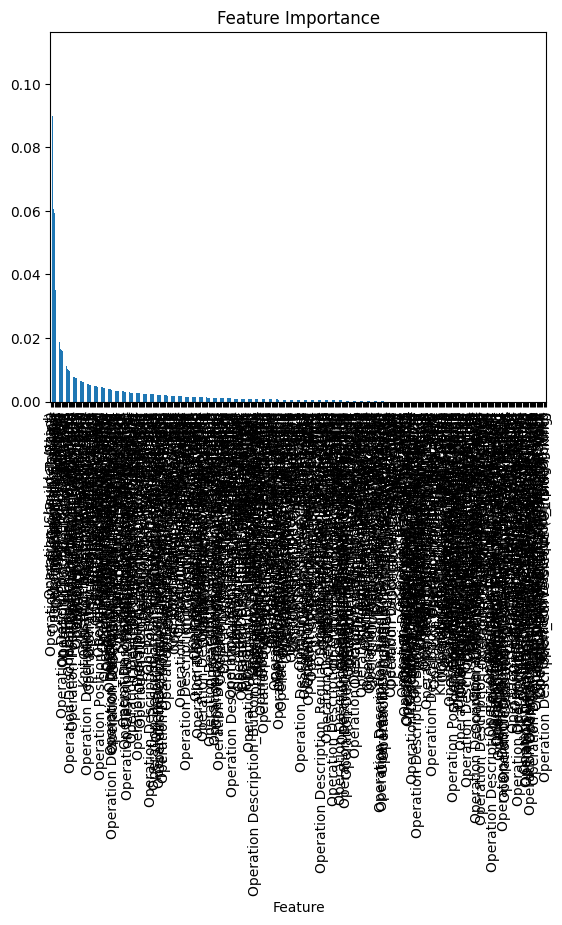

In [ ]:
# 13. Feature Importance Analysis
importances = best_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
feature_importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance')
plt.show()


Residual Analysis:
Mean Residual: 0.03914671763777733
Max Residual: 2.5147581100463867
Min Residual: -3.374319553375244


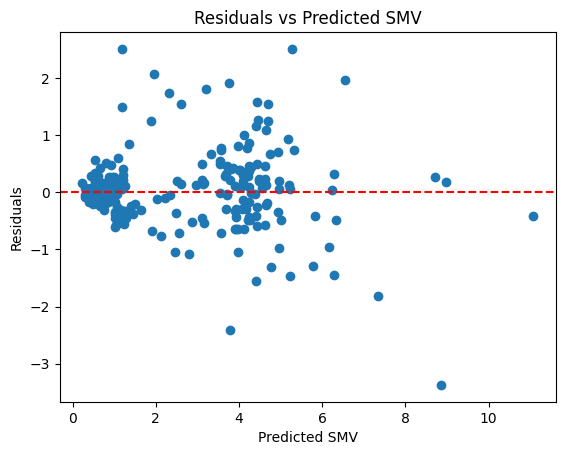

In [ ]:
# 14. Residual Analysis
residuals = y_test_np - y_pred
print(f"\nResidual Analysis:")
print(f"Mean Residual: {np.mean(residuals)}")
print(f"Max Residual: {np.max(residuals)}")
print(f"Min Residual: {np.min(residuals)}")

# Plot Residuals vs Predicted SMV
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted SMV')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted SMV')
plt.show()


## **All about XGboost**

First few rows of the dataset:
    GG                   Operation Operation Position Operation Description  \
0  7GG  Interlock (Point to Point)         Front Part              Shoulder   
1  7GG  Interlock (Point to Point)             Sleeve                Sleeve   
2  7GG  Interlock (Point to Point)  Front & Back Part              Shoulder   
3  7GG  Interlock (Point to Point)             Sleeve                Sleeve   
4  7GG  Interlock (Point to Point)         Front Part              Shoulder   

   Percentage 1  Fiber 1 Count 1  Ply 1  Percentage 2   Fiber 2 Count 2  \
0            73  Acrylic       0      0            24     Nylon       0   
1            73  Acrylic       0      0            24     Nylon       0   
2            60   Cotton       0      0            40  Acrylic     2/16   
3            60   Cotton       0      0            40   Acrylic    2/16   
4           100   Cotton    2/20      3             0         0       0   

   Ply 2  Percentage 3  Fiber 3 Count 3  Pl

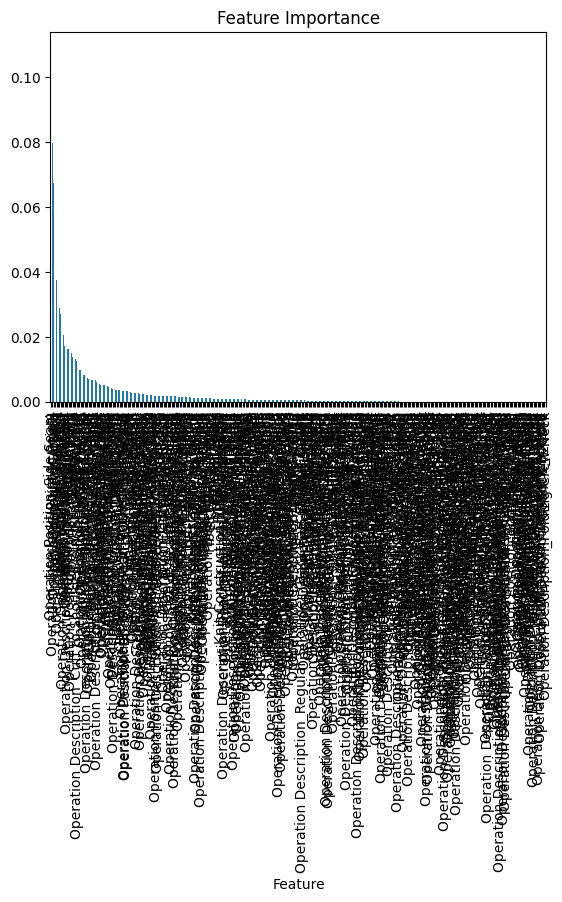


Residual Analysis:
Mean Residual: 0.020012320950627327
Max Residual: 3.572326421737671
Min Residual: -2.2374861240386963


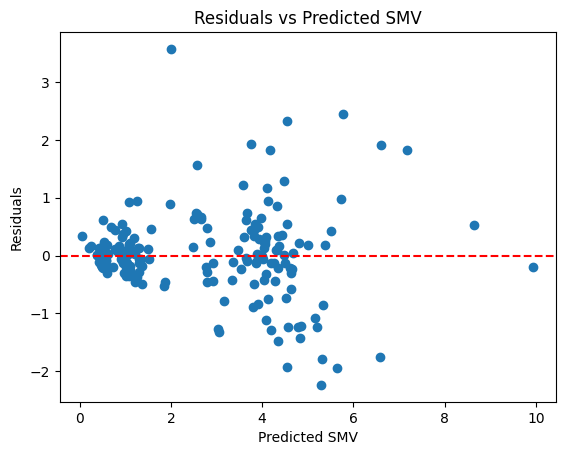

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib


# 1. Data Loading
data = pd.read_excel('/content/SMV.xlsx')  # Load dataset
print("First few rows of the dataset:")
print(data.head())  # Display the first few rows

# 2. Data Cleaning
data.replace('-', pd.NA, inplace=True)  # Replace '-' with NaN
data.fillna(0, inplace=True)  # Fill NaN values with 0
print("\nDataset after cleaning:")
print(data.info())  # Check the dataset after cleaning

# 3. Feature Selection
categorical_features = ['GG', 'Operation', 'Operation Position', 'Operation Description',
                        'Fiber 1', 'Fiber 2', 'Fiber 3', 'Knit Construction',
                        'Count 1', 'Count 2', 'Count 3']

numerical_features = ['Percentage 1', 'Percentage 2', 'Percentage 3',
                      'Ply 1', 'Ply 2', 'Ply 3', 'MC Speed', 'Length (cm)']

# 4. Encoding Categorical Variables
data_encoded = pd.get_dummies(data, columns=categorical_features)
print("\nFirst few rows after encoding categorical variables:")
print(data_encoded.head())  # Display first few rows of the encoded data

# 5. Splitting the Data into Features and Target
X = data_encoded.drop('SMV', axis=1)  # Features (everything except SMV)
y = data_encoded['SMV']  # Target (SMV)

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData split into training and test sets.")

# Convert X_train and X_test to NumPy arrays and ensure all are floats
X_train_np = X_train.values.astype(np.float32)
X_test_np = X_test.values.astype(np.float32)
y_train_np = y_train.values.astype(np.float32)
y_test_np = y_test.values.astype(np.float32)

# 7. Hyperparameter Tuning with Grid Search
# Define the model
model = xgb.XGBRegressor(tree_method='hist', enable_categorical=False, random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5, verbose=1, error_score='raise')
grid_search.fit(X_train_np, y_train_np)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best R² score from Grid Search:", grid_search.best_score_)

# 8. Training the XGBoost Model
best_model = grid_search.best_estimator_  # Use the best model from Grid Search
best_model.fit(X_train_np, y_train_np)  # Train the model
print("\nXGBoost Model trained.")

# 9. Saving the Trained Model
joblib.dump(best_model, 'trained_xgboost_model.pkl')  # Save the model to a file
print("\nTrained model saved.")

# 10. Making Predictions on the Test Set
y_pred = best_model.predict(X_test_np)  # Predictions on the test set

# 11. Model Evaluation
mae = mean_absolute_error(y_test_np, y_pred)
mse = mean_squared_error(y_test_np, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_np, y_pred)

# Accuracy-like score (not traditionally used for regression but here for your request)
accuracy_score = np.mean(np.abs(y_test_np - y_pred) <= np.mean(y_test_np))  # Adjusted for regression context

print(f"\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Accuracy-like Score (within mean SMV): {accuracy_score * 100:.2f}%")  # As a percentage

# 12. Saving Predictions to an Excel File
X_test_with_categories = X_test.copy()  # Copy test features
X_test_with_categories['Actual SMV'] = y_test  # Add actual SMV
X_test_with_categories['Predicted SMV'] = y_pred  # Add predicted SMV

X_test_with_categories.to_excel('SMV_predictions_with_categories.xlsx', index=False)  # Save to Excel
print("\nPredictions saved to 'SMV_predictions_with_categories.xlsx'.")

# 13. Feature Importance Analysis
importances = best_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
feature_importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance')
plt.show()

# 14. Residual Analysis
residuals = y_test_np - y_pred
print(f"\nResidual Analysis:")
print(f"Mean Residual: {np.mean(residuals)}")
print(f"Max Residual: {np.max(residuals)}")
print(f"Min Residual: {np.min(residuals)}")

# Plot Residuals vs Predicted SMV
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted SMV')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted SMV')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# 1. Data Loading
data = pd.read_excel('/content/SMV.xlsx')  # Load dataset
print("First few rows of the dataset:")
print(data.head())  # Display the first few rows


First few rows of the dataset:
    GG                   Operation Operation Position Operation Description  \
0  7GG  Interlock (Point To Point)         Front Part              Shoulder   
1  7GG  Interlock (Point To Point)             Sleeve                Sleeve   
2  7GG  Interlock (Point To Point)  Front & Back Part              Shoulder   
3  7GG  Interlock (Point To Point)             Sleeve                Sleeve   
4  7GG  Interlock (Point To Point)         Front Part              Shoulder   

   Percentage 1  Fiber 1 Count 1  Ply 1  Percentage 2   Fiber 2 Count 2  \
0            73  Acrylic       0      0            24     Nylon       0   
1            73  Acrylic       0      0            24     Nylon       0   
2            60   Cotton       0      0            40  Acrylic     2/16   
3            60   Cotton       0      0            40   Acrylic    2/16   
4           100   Cotton    2/20      3             0         0       0   

   Ply 2  Percentage 3  Fiber 3 Count 3  Pl

In [ ]:
# 2. Data Cleaning
data.replace('-', pd.NA, inplace=True)  # Replace '-' with NaN
data.fillna(0, inplace=True)  # Fill NaN values with 0
print("\nDataset after cleaning:")
print(data.info())  # Check the dataset after cleaning


Dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265 entries, 0 to 1264
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GG                     1265 non-null   object 
 1   Operation              1265 non-null   object 
 2   Operation Position     1265 non-null   object 
 3   Operation Description  1265 non-null   object 
 4   Percentage 1           1265 non-null   int64  
 5   Fiber 1                1265 non-null   object 
 6   Count 1                1265 non-null   object 
 7   Ply 1                  1265 non-null   int64  
 8   Percentage 2           1265 non-null   int64  
 9   Fiber 2                1265 non-null   object 
 10  Count 2                1265 non-null   object 
 11  Ply 2                  1265 non-null   int64  
 12  Percentage 3           1265 non-null   int64  
 13  Fiber 3                1265 non-null   object 
 14  Count 3                1265 non

In [ ]:
# 3. Feature Selection
categorical_features = ['GG', 'Operation', 'Operation Position', 'Operation Description',
                        'Fiber 1', 'Fiber 2', 'Fiber 3', 'Knit Construction',
                        'Count 1', 'Count 2', 'Count 3']

numerical_features = ['Percentage 1', 'Percentage 2', 'Percentage 3',
                      'Ply 1', 'Ply 2', 'Ply 3', 'MC Speed', 'Length (cm)']

In [ ]:
# 4. Encoding Categorical Variables
data_encoded = pd.get_dummies(data, columns=categorical_features)
print("\nFirst few rows after encoding categorical variables:")
print(data_encoded.head())  # Display first few rows of the encoded data


First few rows after encoding categorical variables:
   Percentage 1  Ply 1  Percentage 2  Ply 2  Percentage 3  Ply 3  MC Speed  \
0            73      0            24      0             3      0         7   
1            73      0            24      0             3      0         7   
2            60      0            40      0             0      0         6   
3            60      0            40      0             0      0         6   
4           100      3             0      0             0      0         6   

   Length (cm)   SMV  GG_12GG  ...  Count 3_ 1/11  Count 3_ 2/28  \
0         30.0  0.46    False  ...          False          False   
1         25.0  0.40    False  ...          False          False   
2         64.0  1.21    False  ...          False          False   
3         36.0  0.72    False  ...          False          False   
4         32.0  0.46    False  ...          False          False   

   Count 3_ 2/48  Count 3_0  Count 3_1/11  Count 3_1/6  Count 3_2/16

In [ ]:
# 5. Splitting the Data into Features and Target
X = data_encoded.drop('SMV', axis=1)  # Features (everything except SMV)
y = data_encoded['SMV']  # Target (SMV)


In [ ]:
# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData split into training and test sets.")
# Convert X_train and X_test to NumPy arrays and ensure all are floats
X_train_np = X_train.values.astype(np.float32)
X_test_np = X_test.values.astype(np.float32)
y_train_np = y_train.values.astype(np.float32)
y_test_np = y_test.values.astype(np.float32)


Data split into training and test sets.


In [ ]:
# 7. Hyperparameter Tuning with Grid Search
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5, verbose=1, error_score='raise')
grid_search.fit(X_train_np, y_train_np)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best R² score from Grid Search:", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best R² score from Grid Search: 0.8481514298320925


In [ ]:
# 8. Training the Random Forest Model
best_model = grid_search.best_estimator_  # Use the best model from Grid Search
best_model.fit(X_train_np, y_train_np)  # Train the model
print("\nRandom Forest Model trained.")


Random Forest Model trained.


In [ ]:
# 9. Saving the Trained Model
joblib.dump(best_model, 'trained_random_forest_model.pkl')  # Save the model to a file
print("\nTrained model saved.")


Trained model saved.


In [ ]:
# 10. Making Predictions on the Test Set
y_pred = best_model.predict(X_test_np)  # Predictions on the test set

In [ ]:
# 11. Model Evaluation
mae = mean_absolute_error(y_test_np, y_pred)
mse = mean_squared_error(y_test_np, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_np, y_pred)

# Accuracy-like score (not traditionally used for regression but here for your request)
accuracy_score = np.mean(np.abs(y_test_np - y_pred) <= np.mean(y_test_np))  # Adjusted for regression context

print(f"\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Accuracy-like Score (within mean SMV): {accuracy_score * 100:.2f}%")  # As a percentage


Model Performance:
Mean Absolute Error (MAE): 0.4434037674466436
Mean Squared Error (MSE): 0.4629169305947843
Root Mean Squared Error (RMSE): 0.6803799898547754
R-squared (R²): 0.892867282377295
Accuracy-like Score (within mean SMV): 99.21%


In [ ]:
# 12. Saving Predictions to an Excel File
X_test_with_categories = X_test.copy()  # Copy test features
X_test_with_categories['Actual SMV'] = y_test  # Add actual SMV
X_test_with_categories['Predicted SMV'] = y_pred  # Add predicted SMV

X_test_with_categories.to_excel('SMV_predictions_with_categories_random_forest.xlsx', index=False)  # Save to Excel
print("\nPredictions saved to 'SMV_predictions_with_categories_random_forest.xlsx'.")


Predictions saved to 'SMV_predictions_with_categories_random_forest.xlsx'.


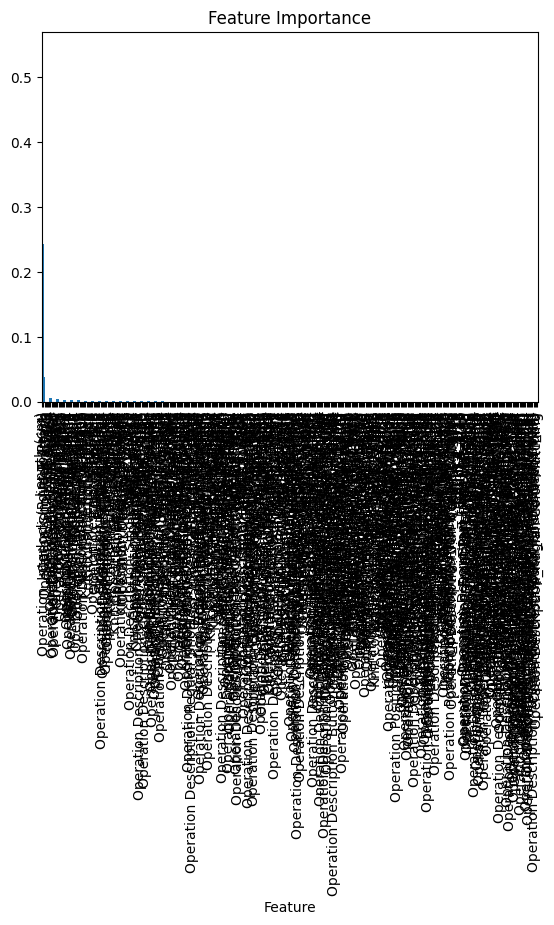

In [ ]:
# 13. Feature Importance Analysis
importances = best_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
feature_importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance')
plt.show()


Residual Analysis:
Mean Residual: 0.06280527629500504
Max Residual: 3.048995165300963
Min Residual: -3.078086073911809


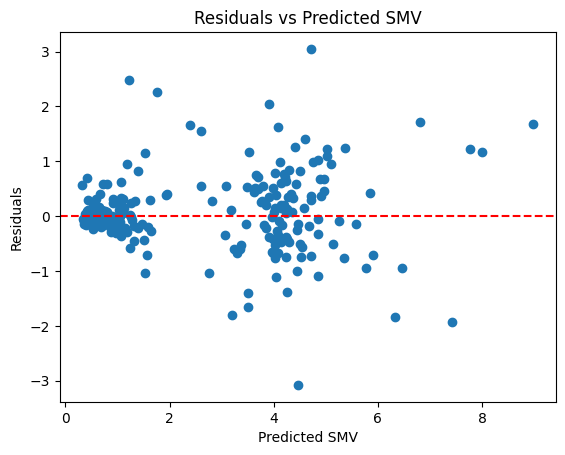

In [ ]:
# 14. Residual Analysis
residuals = y_test_np - y_pred
print(f"\nResidual Analysis:")
print(f"Mean Residual: {np.mean(residuals)}")
print(f"Max Residual: {np.max(residuals)}")
print(f"Min Residual: {np.min(residuals)}")

# Plot Residuals vs Predicted SMV
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted SMV')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted SMV')
plt.show()


First few rows of the dataset:
    GG                   Operation Operation Position Operation Description  \
0  7GG  Interlock (Point to Point)         Front Part              Shoulder   
1  7GG  Interlock (Point to Point)             Sleeve                Sleeve   
2  7GG  Interlock (Point to Point)  Front & Back Part              Shoulder   
3  7GG  Interlock (Point to Point)             Sleeve                Sleeve   
4  7GG  Interlock (Point to Point)         Front Part              Shoulder   

   Percentage 1  Fiber 1 Count 1  Ply 1  Percentage 2   Fiber 2 Count 2  \
0            73  Acrylic       0      0            24     Nylon       0   
1            73  Acrylic       0      0            24     Nylon       0   
2            60   Cotton       0      0            40  Acrylic     2/16   
3            60   Cotton       0      0            40   Acrylic    2/16   
4           100   Cotton    2/20      3             0         0       0   

   Ply 2  Percentage 3  Fiber 3 Count 3  Pl

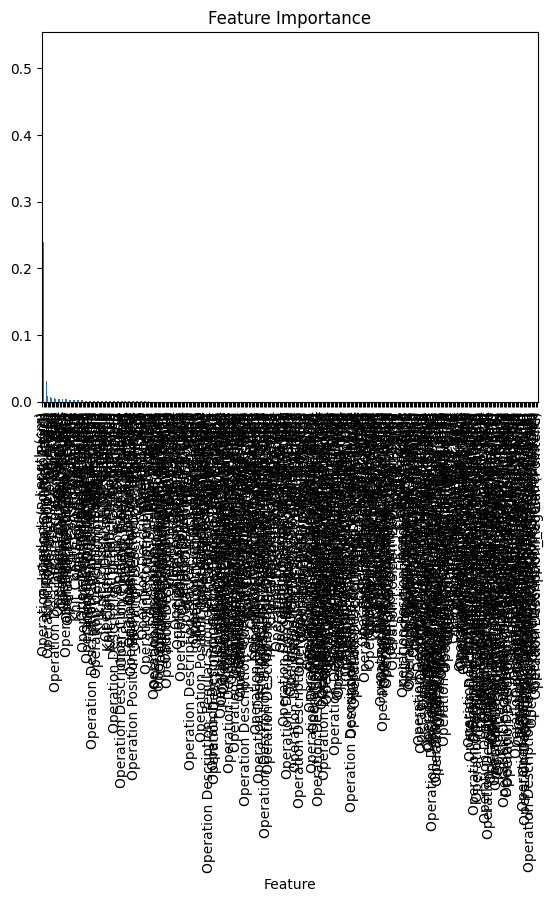


Residual Analysis:
Mean Residual: -0.003760561687619055
Max Residual: 3.290585419676607
Min Residual: -2.1935317407108483


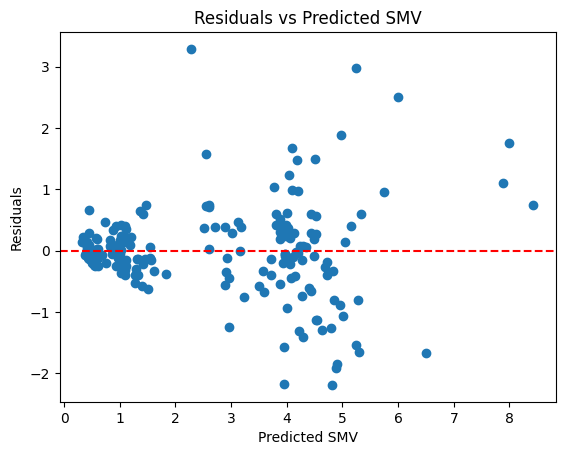

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# 1. Data Loading
data = pd.read_excel('/content/SMV.xlsx')  # Load dataset
print("First few rows of the dataset:")
print(data.head())  # Display the first few rows

# 2. Data Cleaning
data.replace('-', pd.NA, inplace=True)  # Replace '-' with NaN
data.fillna(0, inplace=True)  # Fill NaN values with 0
print("\nDataset after cleaning:")
print(data.info())  # Check the dataset after cleaning

# 3. Feature Selection
categorical_features = ['GG', 'Operation', 'Operation Position', 'Operation Description',
                        'Fiber 1', 'Fiber 2', 'Fiber 3', 'Knit Construction',
                        'Count 1', 'Count 2', 'Count 3']

numerical_features = ['Percentage 1', 'Percentage 2', 'Percentage 3',
                      'Ply 1', 'Ply 2', 'Ply 3', 'MC Speed', 'Length (cm)']

# 4. Encoding Categorical Variables
data_encoded = pd.get_dummies(data, columns=categorical_features)
print("\nFirst few rows after encoding categorical variables:")
print(data_encoded.head())  # Display first few rows of the encoded data

# 5. Splitting the Data into Features and Target
X = data_encoded.drop('SMV', axis=1)  # Features (everything except SMV)
y = data_encoded['SMV']  # Target (SMV)

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData split into training and test sets.")

# Convert X_train and X_test to NumPy arrays and ensure all are floats
X_train_np = X_train.values.astype(np.float32)
X_test_np = X_test.values.astype(np.float32)
y_train_np = y_train.values.astype(np.float32)
y_test_np = y_test.values.astype(np.float32)

# 7. Hyperparameter Tuning with Grid Search
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5, verbose=1, error_score='raise')
grid_search.fit(X_train_np, y_train_np)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best R² score from Grid Search:", grid_search.best_score_)

# 8. Training the Random Forest Model
best_model = grid_search.best_estimator_  # Use the best model from Grid Search
best_model.fit(X_train_np, y_train_np)  # Train the model
print("\nRandom Forest Model trained.")

# 9. Saving the Trained Model
joblib.dump(best_model, 'trained_random_forest_model.pkl')  # Save the model to a file
print("\nTrained model saved.")

# 10. Making Predictions on the Test Set
y_pred = best_model.predict(X_test_np)  # Predictions on the test set

# 11. Model Evaluation
mae = mean_absolute_error(y_test_np, y_pred)
mse = mean_squared_error(y_test_np, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_np, y_pred)

# Accuracy-like score (not traditionally used for regression but here for your request)
accuracy_score = np.mean(np.abs(y_test_np - y_pred) <= np.mean(y_test_np))  # Adjusted for regression context

print(f"\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Accuracy-like Score (within mean SMV): {accuracy_score * 100:.2f}%")  # As a percentage

# 12. Saving Predictions to an Excel File
X_test_with_categories = X_test.copy()  # Copy test features
X_test_with_categories['Actual SMV'] = y_test  # Add actual SMV
X_test_with_categories['Predicted SMV'] = y_pred  # Add predicted SMV

X_test_with_categories.to_excel('SMV_predictions_with_categories_random_forest.xlsx', index=False)  # Save to Excel
print("\nPredictions saved to 'SMV_predictions_with_categories_random_forest.xlsx'.")

# 13. Feature Importance Analysis
importances = best_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
feature_importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance')
plt.show()

# 14. Residual Analysis
residuals = y_test_np - y_pred
print(f"\nResidual Analysis:")
print(f"Mean Residual: {np.mean(residuals)}")
print(f"Max Residual: {np.max(residuals)}")
print(f"Min Residual: {np.min(residuals)}")

# Plot Residuals vs Predicted SMV
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted SMV')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted SMV')
plt.show()
